In [1]:
import sympy as sp

sp.init_printing(use_unicode=True)

In [2]:
# lemma: best reponse is always either (x, 0) or (0, y)

In [3]:
y_eq, N, X, Y, P, gamma = sp.symbols(r"y_eq N X Y P \gamma")

In [4]:
equation = (Y + 2 * N * y_eq) / X - sp.sqrt(
    (Y + 2 * (N - 1) * y_eq) / X * (1 - gamma) / (1 + gamma) * P
)

In [5]:
solution = sp.solve(equation, y_eq)

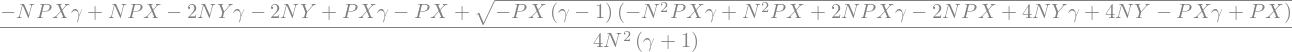

In [6]:
sp.simplify(solution[1]) # This is the positive one

In [7]:
P_c = (Y + 2 * N * y_eq) / X # clearing price
ARB = -(1 + gamma) * (y_eq) + (1 - gamma) * (P * y_eq / P_c) # arbitrageur's profit after paying fee

In [8]:
X_val = 50 * 1_000_000
Y_val = 50 * 1_000_000
P_val = 1.005 # price discrepancy between CEX and FM-AMM spot price
gamma_val = 0.0015 # fee rate. effective fee rate is 2 * gamma
c_val = 10 # tx cost

In [9]:
for i in range(1, 11):
    profit = ARB.subs(y_eq, solution[1]).subs({
        X: X_val,
        Y: Y_val,
        P: P_val,
        gamma: gamma_val,
        N: i
    }).evalf()
    
    print(f"Arbitrageur's profit with N = {i}: {profit}")

Arbitrageur's profit with N = 1: 24.7510728231159
Arbitrageur's profit with N = 2: 10.9992617143760
Arbitrageur's profit with N = 3: 6.18623061606965
Arbitrageur's profit with N = 4: 3.95875480211037
Arbitrageur's profit with N = 5: 2.74890460999734
Arbitrageur's profit with N = 6: 2.01947143837181
Arbitrageur's profit with N = 7: 1.54607749263728
Arbitrageur's profit with N = 8: 1.22154059396959
Arbitrageur's profit with N = 9: 0.989413421016100
Arbitrageur's profit with N = 10: 0.817673145927310


In [10]:
for i in range(1, 11):
    profit = (ARB * N).subs(y_eq, solution[1]).subs({
        X: X_val,
        Y: Y_val,
        P: P_val,
        gamma: gamma_val,
        N: i
    }).evalf()
    
    print(f"LVR with N = {i}: {profit}")

LVR with N = 1: 24.7510728231159
LVR with N = 2: 21.9985234287519
LVR with N = 3: 18.5586918481064
LVR with N = 4: 15.8350192084415
LVR with N = 5: 13.7445230486735
LVR with N = 6: 12.1168286330367
LVR with N = 7: 10.8225424475268
LVR with N = 8: 9.77232475175674
LVR with N = 9: 8.90472078872917
LVR with N = 10: 8.17673145869866


In [11]:
# find the maximum N that arbitrageur's profit is positive
N_max = 0
N_max_profit = 0
N_max_profit_after_tx_cost = 0

for i in range(1, 11):
    profit = ARB.subs(y_eq, solution[1]).subs({
        X: X_val,
        Y: Y_val,
        P: P_val,
        gamma: gamma_val,
        N: i
    }).evalf()

    profit_after_tx_cost = profit - c_val

    if profit_after_tx_cost > 0:
        N_max = i
        N_max_profit = profit
        N_max_profit_after_tx_cost = profit_after_tx_cost
    else:
        break

print(f"Maximum N: {N_max}")
print(f"Arbitrageur's profit w/o tx cost with N = {N_max}: {N_max_profit}")
print(f"Arbitrageur's profit w/ tx cost with N = {N_max}: {N_max_profit_after_tx_cost}")
print(f"LVR w/ tx cost with N = {N_max}: {N_max_profit * N_max}")

Maximum N: 2
Arbitrageur's profit w/o tx cost with N = 2: 10.9992617143760
Arbitrageur's profit w/ tx cost with N = 2: 0.999261714375971
LVR w/ tx cost with N = 2: 21.9985234287519
